In [1]:
# standard imports
import pandas as pd

# my imports
import wrangle as w

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
w.get_zillow_data()

csv file found and loaded


,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
4,4,2.0,3633,296425,2005,6941.39,LA,0.02
6,3,4.0,1620,847770,2011,10244.94,LA,0.01
7,3,2.0,2077,646760,1926,7924.68,LA,0.01
11,0,0.0,1200,5328,1972,91.60,LA,0.02
14,0,0.0,171,6920,1973,255.17,LA,0.04
...,...,...,...,...,...,...,...,...
2152856,4,4.0,4375,422400,2015,13877.56,LA,0.03
2152858,4,3.0,2262,960756,2015,13494.52,Orange,0.01
2152859,4,4.5,3127,536061,2014,6244.16,Orange,0.01
2152861,3,2.5,1974,424353,2015,5302.70,Orange,0.01


In [3]:
df = w.get_zillow_data()

csv file found and loaded


In [4]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
4,4,2.0,3633,296425,2005,6941.39,LA,0.02
6,3,4.0,1620,847770,2011,10244.94,LA,0.01
7,3,2.0,2077,646760,1926,7924.68,LA,0.01
11,0,0.0,1200,5328,1972,91.60,LA,0.02
14,0,0.0,171,6920,1973,255.17,LA,0.04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033172 entries, 4 to 2152862
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   bedrooms   int64  
 1   bathrooms  float64
 2   area       int64  
 3   taxvalue   int64  
 4   yearbuilt  int64  
 5   taxamount  float64
 6   county     object 
 7   tax_rate   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 139.6+ MB


In [6]:
df.shape

(2033172, 8)

In [7]:
# Bottom columns have nulls
df.isnull().sum()

bedrooms     0
bathrooms    0
area         0
taxvalue     0
yearbuilt    0
taxamount    0
county       0
tax_rate     0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

bedrooms     0
bathrooms    0
area         0
taxvalue     0
yearbuilt    0
taxamount    0
county       0
tax_rate     0
dtype: int64

In [10]:
df.shape

(2033172, 8)

In [11]:
2152863 - 2140235

12628

# 12,628 rows were dropped during the dropna.

In [12]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
4,4,2.0,3633,296425,2005,6941.39,LA,0.02
6,3,4.0,1620,847770,2011,10244.94,LA,0.01
7,3,2.0,2077,646760,1926,7924.68,LA,0.01
11,0,0.0,1200,5328,1972,91.60,LA,0.02
14,0,0.0,171,6920,1973,255.17,LA,0.04


In [13]:
# Change year build from a float to an int
# SAVE YOUR CHANGES TO THE DATAFRAME
df.yearbuilt = df.yearbuilt.astype(int)
df.yearbuilt

4          2005
6          2011
7          1926
11         1972
14         1973
           ... 
2152856    2015
2152858    2015
2152859    2014
2152861    2015
2152862    2014
Name: yearbuilt, Length: 2033172, dtype: int64

In [14]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
4,4,2.0,3633,296425,2005,6941.39,LA,0.02
6,3,4.0,1620,847770,2011,10244.94,LA,0.01
7,3,2.0,2077,646760,1926,7924.68,LA,0.01
11,0,0.0,1200,5328,1972,91.60,LA,0.02
14,0,0.0,171,6920,1973,255.17,LA,0.04


In [15]:
for i in df.columns:
    print (i)
    print(df[i].value_counts())
    print ('-----------------------')

bedrooms
3     938561
4     595894
2     328193
5     122659
1      22430
6      17628
0       4208
7       2843
8        536
9        136
10        52
11        16
13         5
12         4
15         3
14         2
16         2
Name: bedrooms, dtype: int64
-----------------------
bathrooms
2.00     931475
1.00     410357
3.00     400774
2.50     140062
4.00      62953
1.50      31011
3.50      22501
5.00      14220
4.50      10614
0.00       4096
6.00       2830
5.50       1228
7.00        618
6.50        150
8.00        134
7.50         66
9.00         29
10.00        15
0.50         13
11.00         5
16.00         4
1.75          3
20.00         3
9.50          3
18.00         2
14.00         2
12.00         1
8.50          1
13.00         1
15.00         1
Name: bathrooms, dtype: int64
-----------------------
area
1200    5168
1080    4368
1120    4344
1400    3808
1440    3663
        ... 
7175       1
8308       1
8112       1
5695       1
7026       1
Name: area, Length: 6639,

## Rename columns

In [16]:
df.columns

Index(['bedrooms', 'bathrooms', 'area', 'taxvalue', 'yearbuilt', 'taxamount',
       'county', 'tax_rate'],
      dtype='object')

In [17]:
df = df.rename(columns={'bedroomcnt':'bedrooms', 'bathroomcnt':'bathrooms', 'calculatedfinishedsquarefeet':'area',
       'taxvaluedollarcnt':'taxvalue', 'fips':'county'})

In [18]:
df

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
4,4,2.0,3633,296425,2005,6941.39,LA,0.02
6,3,4.0,1620,847770,2011,10244.94,LA,0.01
7,3,2.0,2077,646760,1926,7924.68,LA,0.01
11,0,0.0,1200,5328,1972,91.60,LA,0.02
14,0,0.0,171,6920,1973,255.17,LA,0.04
...,...,...,...,...,...,...,...,...
2152856,4,4.0,4375,422400,2015,13877.56,LA,0.03
2152858,4,3.0,2262,960756,2015,13494.52,Orange,0.01
2152859,4,4.5,3127,536061,2014,6244.16,Orange,0.01
2152861,3,2.5,1974,424353,2015,5302.70,Orange,0.01


## Handle nulls

In [19]:
#df = df.dropna()
#df.isnull().sum()

## Check 

In [20]:
#df.isnull().sum()

6037 - LA county
6059 - Orange county
6111 - Ventura county

In [21]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
4,4,2.0,3633,296425,2005,6941.39,LA,0.02
6,3,4.0,1620,847770,2011,10244.94,LA,0.01
7,3,2.0,2077,646760,1926,7924.68,LA,0.01
11,0,0.0,1200,5328,1972,91.60,LA,0.02
14,0,0.0,171,6920,1973,255.17,LA,0.04


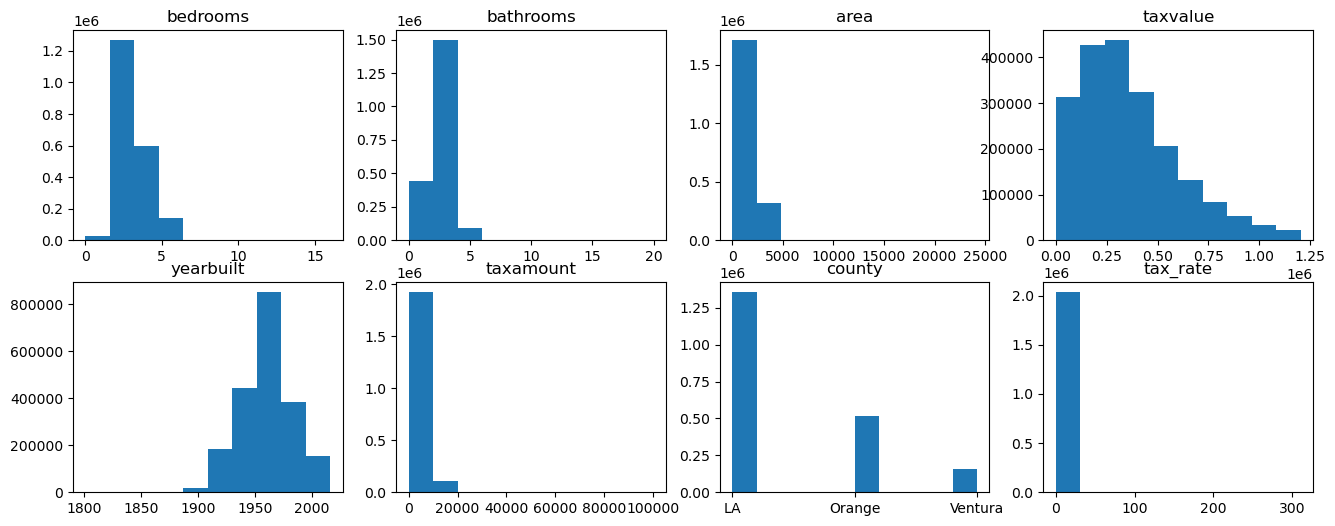

In [22]:
plt.figure(figsize=(16, 6))

for i, col in enumerate(df.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(2, 4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    plt.hist(df[col])

plt.show()

In [23]:
from sklearn.model_selection import train_test_split

bedrooms


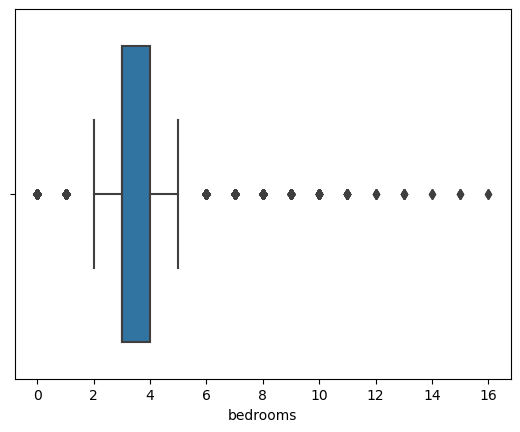

0       4208
1      22430
2     328193
3     938561
4     595894
5     122659
6      17628
7       2843
8        536
9        136
10        52
11        16
12         4
13         5
14         2
15         3
16         2
Name: bedrooms, dtype: int64

bathrooms


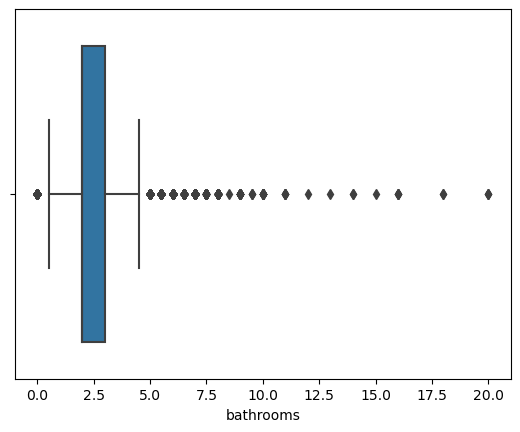

0.00       4096
0.50         13
1.00     410357
1.50      31011
1.75          3
2.00     931475
2.50     140062
3.00     400774
3.50      22501
4.00      62953
4.50      10614
5.00      14220
5.50       1228
6.00       2830
6.50        150
7.00        618
7.50         66
8.00        134
8.50          1
9.00         29
9.50          3
10.00        15
11.00         5
12.00         1
13.00         1
14.00         2
15.00         1
16.00         4
18.00         2
20.00         3
Name: bathrooms, dtype: int64

area


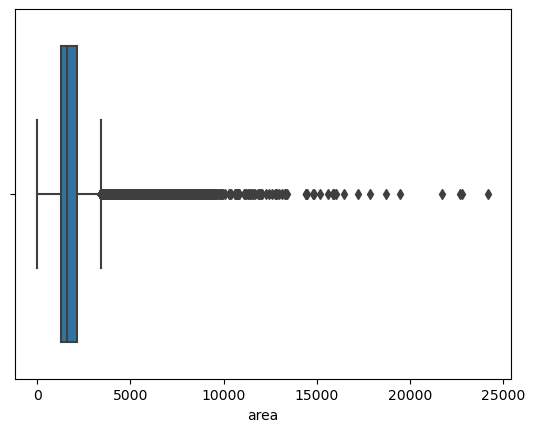

1        6
2        1
3        6
10       2
12       1
        ..
19460    1
21734    1
22702    1
22800    1
24220    1
Name: area, Length: 6639, dtype: int64

taxvalue


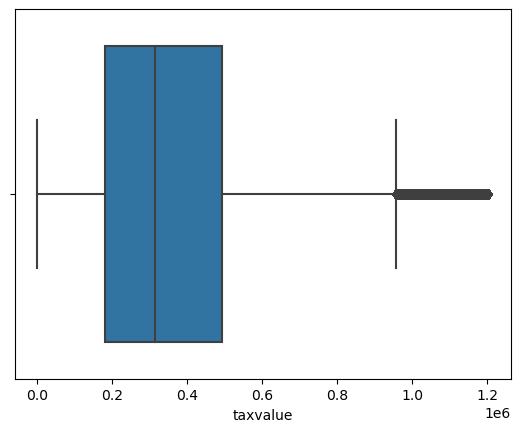

22         10
23          6
31          1
46          1
101         1
           ..
1202886     1
1202942     1
1202959     1
1202988     1
1202999     1
Name: taxvalue, Length: 523005, dtype: int64

yearbuilt


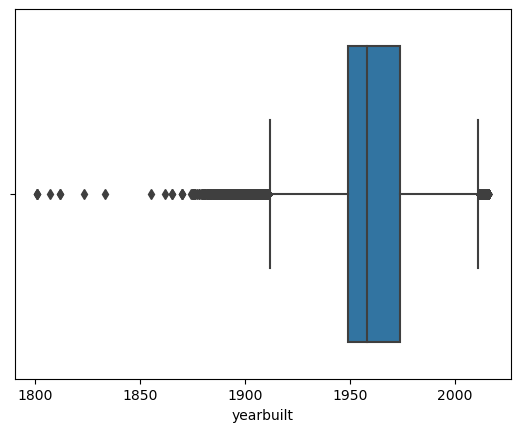

1801       3
1807       1
1812       2
1823       1
1833       1
        ... 
2012    2386
2013    3210
2014    3319
2015    2638
2016      74
Name: yearbuilt, Length: 152, dtype: int64

taxamount


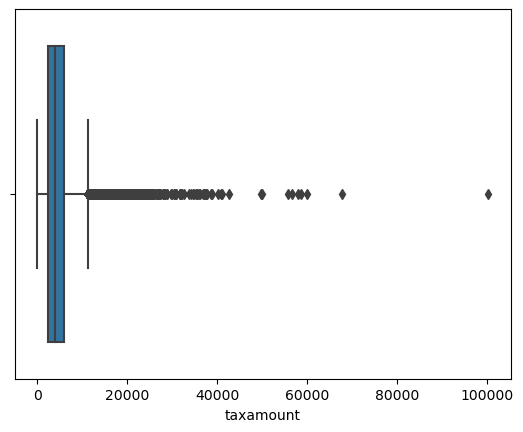

6.34         1
13.36        4
13.44        1
13.47        4
13.48        1
            ..
57963.32     1
58634.77     1
60110.79     1
67715.45     1
100379.34    1
Name: taxamount, Length: 814643, dtype: int64

county


TypeError: Horizontal orientation requires numeric `x` variable.

In [27]:
for col in df.columns[:-1]:
    print(col)
    sns.boxplot(data=df, x=col)
    plt.show()
    
    print(df[col].value_counts().sort_index())
    print()

In [24]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.25, random_state=123)

In [25]:
train.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
1571798,4,2.5,2987,885000,2006,13617.38,Orange,0.02
1723553,3,2.0,3013,489511,1977,5768.57,LA,0.01
718174,4,3.0,2572,390915,1986,4944.11,LA,0.01
1663205,3,1.0,1589,321758,1959,4031.78,LA,0.01
1087891,3,2.0,1727,231737,1962,2708.80,Ventura,0.01


In [26]:
train.shape

(1219902, 8)